In [22]:
import pandas as pd

df = pd.read_csv('./work/data/insurance.csv')

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [25]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
x = df.drop(columns=['charges'])
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [27]:
x["sex"] = df["sex"].replace({"female": 1, "male": 2})
x["smoker"] = df["smoker"].replace({"yes": 1, "no": 0})
x["region"] = df["region"].replace({"southwest": 1, "southeast": 2, "northwest": 3, "northeast": 4})
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,2,33.770,1,0,2
2,28,2,33.000,3,0,2
3,33,2,22.705,0,0,3
4,32,2,28.880,0,0,3


In [28]:
y = df["charges"]
type(y)
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
features = poly.fit_transform(x)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(features,y)

LinearRegression()

In [39]:
y_pred = model.predict(features)

In [42]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error
import numpy as np


rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print('rmse: ', rmse)
print('r2: ', r2)
print('mae: ', mean_absolute_error(y, y_pred))
print('mse: ', mean_squared_error(y, y_pred))

rmse:  4320.572754176242
r2:  0.8726150094556051
mae:  2755.442522717154
mse:  18667348.92413008


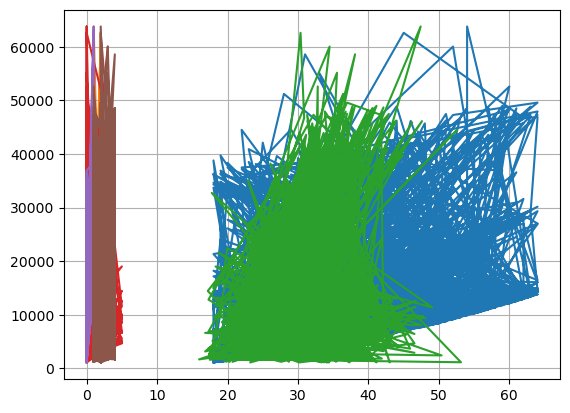

In [43]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.grid()
plt.show()